In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Introduction and numeracy

## What are "statistical methods," and why do we need them in Earth and atmospheric sciences?

To address this, let's split the course title into three pieces:

1. **Statistical**
2. **Methods**
3. **in Earth and Atmospheric Sciences**

### "Statistical"

Imagine a very simple dataset: "Whether or not it rained more than one foot in Central Park on August 15, 2023".  It consists of a single value: `No` (you can take my word for it). 

We don't need anything complicated to characterize it.  As the saying goes, in this rather odd instance, the data "speaks for itself."

Now let's look at a more realistic dataset: the actual daily precipitation as measured by the [Central Park weather station](https://w1.weather.gov/data/obhistory/KNYC.html).  This record spans from the year 1869 to today.  Does this data "speak for itself"?  

If it did, we could just print out its values, take it all in, and be pleased with ourselves.  Let's try that using Python, the programming language that we'll use throughout this course (if the lines of code below seem mysterious or confusing to you, just set that aside for now, and trust that we've used them to load daily data from the Central Park weather station):

In [2]:
import xarray as xr

In [3]:
filepath_in = "../data/central-park-station-data_1869-01-01_2023-09-30.nc"
ds_central_park = xr.open_dataset(filepath_in)
precip_central_park = ds_central_park["precip"]

In [4]:
print(f"# of values in the dataset: {len(precip_central_park)}")

# of values in the dataset: 56520


That's probably more than we can take in by eye.  Let's try anyways:

In [5]:
import numpy as np

# Need this so that it actually prints all the values rather than just a few.
with np.printoptions(threshold=np.inf):
    print(precip_central_park.values)

[0.75 0.03 0.   0.18 0.05 0.   0.   0.   0.   0.01 0.   0.85 0.   0.
 0.04 0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.47 0.   0.   0.   0.   1.55 0.   0.   0.   0.   0.   0.85 0.05
 0.   0.   0.   2.6  0.   0.   0.54 0.06 0.   0.   0.   0.56 0.   0.
 0.66 0.   0.   0.   0.02 0.   0.1  0.   0.03 0.   0.   0.   1.06 0.
 0.   0.   0.02 0.18 0.   0.   0.   0.   0.28 0.   0.   0.95 0.   0.
 0.   0.78 0.   0.   1.15 0.04 0.01 0.43 0.   0.   0.   0.   0.3  0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.12 0.08 0.
 0.   0.   0.   0.   0.   0.05 0.36 0.   0.58 0.7  0.02 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.12 0.   0.15 0.5  0.   0.   0.87 0.
 0.27 0.19 0.   0.   0.   0.4  0.   0.07 0.   0.14 0.14 0.   0.08 0.
 0.   0.08 0.   0.   0.33 0.   0.19 0.01 0.01 0.   0.93 0.06 0.   0.
 0.   0.   0.   1.53 0.02 0.   0.01 0.   0.02 0.67 0.2  0.   0.26 0.
 0.   0.42 0.   0.   0.   0.   0.   0.52 0.   0.   0.   0.1  0.18 0.05
 0.38 0.   0.   0.   0.04 0.64

One thing that does immediately pop out is that a lot of the values are exactly zero.  That makes sense---in New York City at least, most days don't have any rain.

But beyond that single inference, clearly there's just way too much for the data to "speak for itself".  In fact, that's true for anything more than a few data points.  Moreover, while more than 50,000 data points may sound like a lot, in the Earth Sciences it's not uncommon to work with datasets with billions of values.  

:::{admonition} An example of a **much** bigger dataset

For example, consider one of the modern [*reanalysis*](https://en.wikipedia.org/wiki/Atmospheric_reanalysis) datasets widely used by atmospheric scientists, meteorologists, and climate scientists (specifically, [ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) produced by the European Centre for Medium-Range Weather Forecasts), which provides estimates of past weather conditions all over the globe.  This dataset outputs data on a regular latitude-longitude grid with spacing of 0.25$^\circ$ in latitude and 0.25$^\circ$ in longitude between points.  So that's `360 / 0.25 = 1440` longitude points, `180 / 0.25 = 720` latitude points, and thus a lat-lon grid of `1440 x 720 = 1,036,800`, i.e. just over a million points.  

But that's for one single variable at one single time!  ERA5 provides values *every hour* of *dozens* of variables spanning from 1950 to essentially the present.  So, picking just one of these fields, that's `(24 hours / day) x (365.25 days / year) x (73 years) = 639,918` values in time at each lat-lon gridpoint, for a total of `1,036,800 x 639,918 = 663,466,982,400` data points!  So that's over 660 billion values per variable!  

(And many atmospheric variables like temperature, wind speed, and humidity, are defined not just at Earth's surface or a single level, but on as many as 37 levels extending from near the surface to high up into the stratosphere.  So for those you're well over a *trillion* values per variable.)
:::

**Upshot**: Pretty much always, we need to translate our raw data into digestible chunks: individual numbers and plots that capture key things about the dataset we want to know.  And that's exactly what statistics provides.

Maybe that's being unfair.  Of course "speak for itself" doesn't mean dumping the numerical values out, it means plotting them!  So let's try that:

In [6]:
# First, import the matplotlib package that we'll use for plotting.
from matplotlib import pyplot as plt

In [7]:
# Then update the plotting aesthetics using my own custom package named "puffins"
# See: https://github.com/spencerahill/puffins
from puffins import plotting as pplt

plt.rcParams.update(pplt.plt_rc_params_custom)

/Users/sah2249/Library/CloudStorage/Dropbox/py/puffins/puffins/eq_area.py:265: SyntaxWarning: invalid escape sequence '\s'
  - $\sin\varphi_w$: sine of the poleward edge of the winter cell
/Users/sah2249/Library/CloudStorage/Dropbox/py/puffins/puffins/eq_area.py:359: SyntaxWarning: invalid escape sequence '\s'
  - $\sin\varphi_w$: sine of the poleward edge of the winter cell
/Users/sah2249/Library/CloudStorage/Dropbox/py/puffins/puffins/eq_area.py:436: SyntaxWarning: invalid escape sequence '\s'
  - $\sin\varphi_w$: sine of the poleward edge of the winter cell
/Users/sah2249/Library/CloudStorage/Dropbox/py/puffins/puffins/eq_area.py:494: SyntaxWarning: invalid escape sequence '\s'
  - $\sin\varphi_w$: sine of the poleward edge of the winter cell
/Users/sah2249/Library/CloudStorage/Dropbox/py/puffins/puffins/eq_area.py:575: SyntaxWarning: invalid escape sequence '\s'
  - $\sin\varphi_w$: sine of the poleward edge of the winter cell


Text(0, 0.5, 'daily precip [inches]')

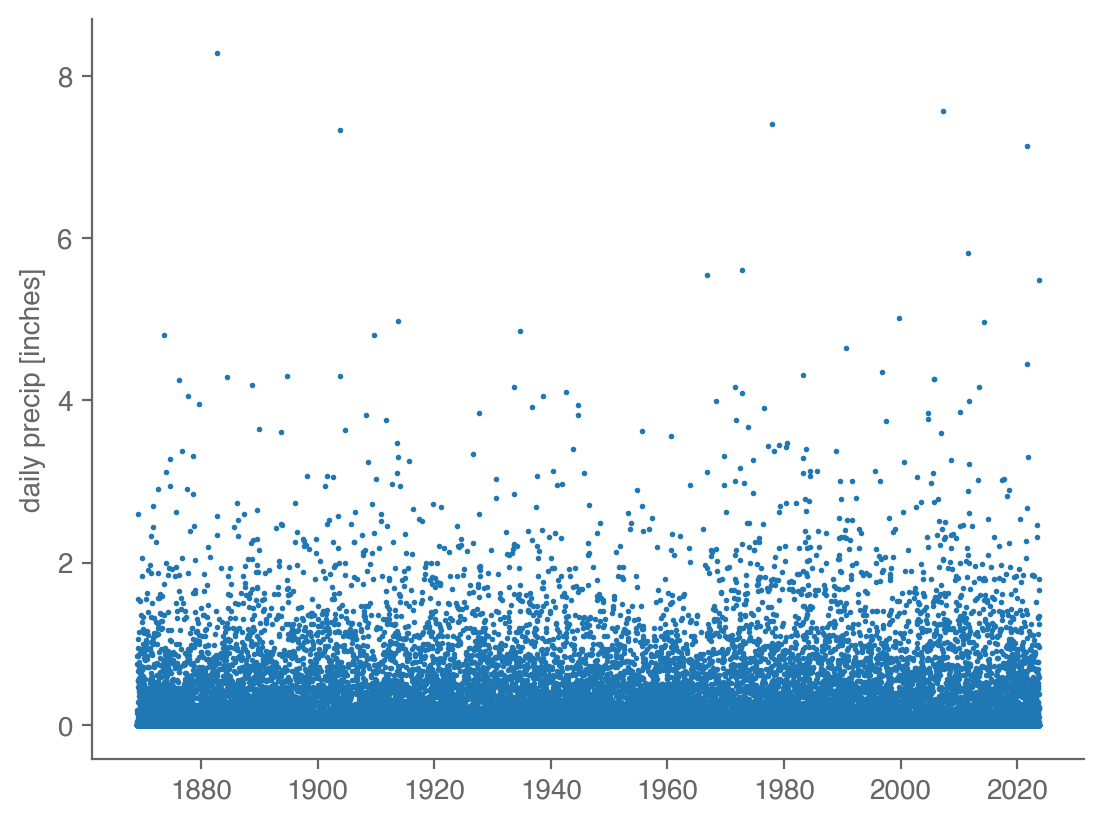

In [8]:
# Create the figure and the axes that the data will be plotted on.
fig = plt.figure()
ax = fig.subplots()

# Now actually plot the data.
precip_central_park.plot(ax=ax, linestyle="none", marker=".", markersize=2)
ax.set_xlabel("")
ax.set_ylabel("daily precip [inches]")

Much better.  There's now quite a lot we can infer, right away:

- The highest value ever recorded was over 8 inches, somewere just after 1880
- There have been five total times it exceeded 6 inches
- It's "jumpy": values can go from very low (including zero) to very high from one day to the next or from very high to very low
- There's not an obvious strong seasonal signal

BUT there's still so much more we can't infer.

- Is there a long term increasing or decreasing trend that we could be confident of?
- Despite the overall "jumpiness," and lack of strong seasonality, are there discernible cycles (e.g. every four weeks, three years or 2 decades) where values tend to be higher or lower than the long-term average?

AND we haven't actually let the data speak for itself: we chose to plot it in a particular way, as a timeseries.  But there are other ways, and these change what things you can and can't infer!

Let's compare this to the daily average air temperature data from the same Central Park dataset:

In [9]:
temp_central_park = ds_central_park["temp_avg"]

Text(0, 0.5, 'daily temperature [$^\\circ$F]')

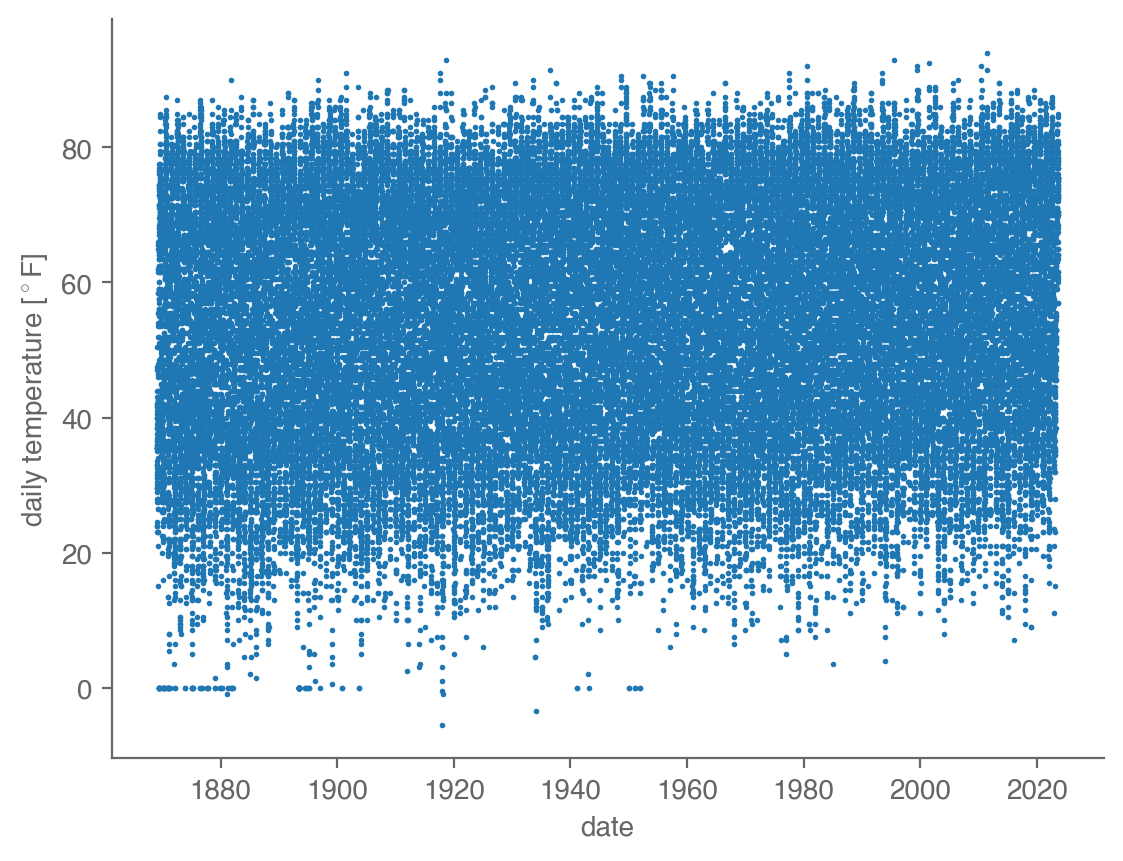

In [10]:
fig = plt.figure()
ax = fig.subplots()
temp_central_park.plot(linestyle="none", marker=".", markersize=2)
ax.set_xlabel("date")
ax.set_ylabel(r"daily temperature [$^\circ$F]")

Much different!  Among many other things that we can infer (which we'll save until the next lecture on [descriptive statistics](./descriptive-statistics)), we can see that daily rainfall and daily temperatures at Central Park behave very differently in many ways.

That said, for temperature too, clearly there is *way* too much going on to be able to take it in at a glance and truly understand it: here again, we need *statistics*.

### "Methods"

Think of *methods* as just another word for *tools*.  As such, what we're after in this course is building a *toolkit* of statistical techniques that will be valuable to you in your research and other coursework.  This has some important implications:

- We'll focus *less* on the underlying theoretical basis for the techniques we'll discuss.  Just enough to be confident in their meaning, their conceptual basis, and their interpretation.
- We'll focus *more* on implementing them IRL (in real life).  That means coding them up and using them to analyze real datasets from the Earth sciences.
- We'll devote time not just to specific analysis techniques, but all the other steps in the pipeline from a raw data file to accurately generated statistical measures and pretty plots.  That includes things like:
  - setting up your computational environment (python, conda, jupyter, ...)
  - dealing with different file formats (netCDF, CSV, .xls, grib, ...)
  - cleaning your data (missing data, clearly wrong data, probably wrong data, ...)
  - computer performance, i.e. making your calculations run in a reasonable amount of time (vectorized routines, parallelization, ...)

### "in Earth and Atmospheric Sciences"

Of course, being in the EAS department, we will focus almost exclusively on datasets and problems that arise in the Earth and Atmospheric Sciences (as opposed to, say, medicine or sociology).  And my own research emphasis with EAS is on rainfall and how it varies on many timescales (day to day, season to season, year to year, etc.), which will bias the example datasets used in that direction.  Finally, at *The* City College of New York after all, we'll use data from our own backyard as much as possible---chiefly, this Central Park weather station dataset introduced above.

But the overall approach---how to characterize datasets as succinctly and accurately as possible, individually and as they relate to one another---is universally applicable.  Likewise for the vast majority of the individual tools themselves; with modest effort nearly all of them can be adapted to a wide array of datasets, e.g. time series of economic data, astronomical data from telescopes, biometric data from your smart watch.

## Why care about statistics at all?

Why bother with things like conditional probabilities, autocorrelations, covariance matrices, etc., which especially if you haven't heard of them before might sound like kind of a pain?  Well, virtually every major problem in the Earth sciences---and in fact, virtually every major problem facing the world---ultimately has a statistical basis.

In the Earth sciences, that includes all of the following questions:

- Are extreme rainfall events in New York City becoming more frequent?
- How does the El Niño-Southern Oscillation influence wintertime temperatures in East Asia?
- In ice core records of Earth's climate going back thousands and millions of years, are there key recurring cycles, and if so how long do they last?
- What is the relationship between air pollution and child asthma?
  - Based on that, is there a meaningful difference in child asthma incidence in Harlem vs. the Upper East Side that can be attributed to different levels of air pollution in the two places?

For each of these, there is no single objectively right answer.  Earth's weather and complicated are incredibly complicated systems, with behaviors varying widely across space and time.  Our observational records of those behaviors---a remarkable achievement of humanity, science, technology, and geopolitics to be sure---are necessarily incomplete and imperfect.   The computer models we use to simulate Earth's climate (also remarkable achievements) are today and will always be imperfect.  

**But** through careful analysis using the right statistical techniques, we *can* provide *reasonable* answers to these questions and many more like them.  And these can improve decisions and outcomes in the real world, for individuals (for example, you knowing to bring an umbrella thanks to an accurate forecast of rain) to institutions (for example, where to place and how to design subway entrances given statistical models of flood risk).

## Numeracy

### What numeracy is

As said above, we're aiming to build a *toolbox* of quantitative techniques.  But perhaps even more important than equipping you with a collection of tools to draw from, we want to develop a *state of mind* for quantitative data analysis.  I'll use the term **numeracy** as a shorthand for this.

**Numeracy** (as we'll use it) is the ability to accurately assess *quantitative* claims.  The word is a direct analogy to *literacy*: literacy (the ability to read) enables a person to properly evaluate claims written in words; numeracy enables a person to properly evaluate claims consisting of numbers.

One part of numeracy is assessing not just the *sign* (decreasing/increasing; more/less) but the *magnitudes* of different quantities that come up.  Consider the following three percentage changes in some quantity: -5%, +0.1%, +1000%.  Sure, the first one is a decrease while the second two are an increase, but in terms of magnitude the first two are much more similar---(namely, a small change) than the third (a 10-fold increase).

Another part of numeracy is understanding the relevant **uncertainties**.  There are virtually no interesting questions in the Earth sciences for which one can generate answers with very little uncertainty.

### Numeracy (made-up) example: a severe storm and climate change

Imagine that tomorrow night an intense rain storm hits New York, breaking the record daily value in our Central Park dataset.  One interesting question among many that we'd like to know is what role climate change had in this event.

Non-numerate claims include both of the following:
1. "This storm was caused by climate change."
2. "This storm was not caused by climate change."

Why aren't they numerate?  Well, in short, there are no numbers!  What does "caused" mean precisely here?  Does claim #1 mean that, if climate change wasn't happening, the storm wouldn't have occurred at all?  Or something else?  Conversely, does claim #2 mean that this storm would have been identical with or without climate change?  Absent additional information, it is impossible to answer these or other questions about either claim, rendering them close to worthless.

Here's a *partially* numerate claim; let's imagine a scientist and her research group studied the storm and came to the following conclusion: "The storm was 20% stronger because of climate change."

That's definitely an improvement!  We now have a *quantification* of just how much the storm was affected by climate change, namely that it was strengthened by 20%.

However, even this still is much too vague to be properly evaluated.  What exactly does "strength" mean?  Does it refer to the storm's winds, or rainfall, or some combination of the two, or something else entirely?  We have no way of knowing.

The scientist now clarifies this: "The peak hourly rainfall accumulation located at any point within the storm was made 20% higher because of climate change."

Better still!  We now have a very precise understanding of what physical quantity is being referred to.  But this is still missing a crucial factor: **uncertainty quantification**.  Even without knowing precisely how these scientists came to this value of 20%, it is certain that there are sources of error and/or uncertainty as part of their methods.  And without some reasonable estimate of the uncertainties, any scientific claim is deeply incomplete.  For, imagine the following scenarios:

1. The peak hourly rainfall accumulation (...) was 20% higher, with a 95% confidence interval of 19.2% to 21.4%.
2. The peak hourly rainfall accumulation (...) was 20% higher, with a 95% confidence interval of -90% to +150%.

In Scenario #1, there is little uncertainty (at least as indicated by the "95% confidence interval", whatever that precisely means).  So the "central" value of 20% is, by itself, pretty useful.  Whereas in Scenario #2, the uncertainty range is *huge*!  It spans both huge decreases and even larger increases, making the central value of 20% almost useless.  

:::{admonition} Real-world analogy: meeting up with a friend

Consider a real-world analogy: suppose you're texting with a friend to make plans for the weekend.  Your friend says "I'll meet you at the movie theater at 7pm, but it could be as early as 4pm or as late as 10pm."  How useful is that to you in your planning, compared to if they had said instead, "I'll meet you at the movie theater at 7pm, but it could be as early as 6:50pm or as late as 7:05pm"?

In the same way, in science (not just Earth and Atmospheric Sciences), the larger the uncertainty in a quantity, the harder it is to, roughly speaking, *usefully do things with it*.  So knowing that uncertainty is almost as important as knowing the central value itself!
:::

So we've arrived at a *nearly* numerate claim.  It precisely identifies the physical quantity being consiered and reports both a central value for that quantity and an estimate of the uncertainty in that value.  But there's still one key thing missing.  Do you know what it is?

We don't know anything about *how* this value or its uncertainty were actually calculated!  In other words, we don't know the scientist's *methods*.  Was this based on a purely statistical model (for example, comparing a stationary vs. non-stationary Generalized Extreme Value model to observational data at the Central Park weather station)?  Or was it the result of simulations run with computer climate models in which the storm was simulated in one case with the observed conditions (i.e. the climate change case) vs. in another case with CO2 and other factors set to their "preindustrial" values (i.e. the hypothetical case where there was no human-driven climate change).

Neither approach is obviously worse or better.  And it's possible that the two approaches could ultimately result in very similar answers!  In that case, we'd trust the combined result even more (not worrying precisely "trust" means in this context).  But it's also possible (this happens all the time) that two different methodologies (or even just different climate models but otherwise identical methodologies) yield extremely different results!

### Lies, damned lies, and statistics

:::{epigraph}
There are three kinds of lies: lies, damned lies, and statistics.

-- Mark Twain

:::

This [well-known](https://en.wikipedia.org/wiki/Lies,_damned_lies,_and_statistics) [quote](https://www.york.ac.uk/depts/maths/histstat/lies.htm) is most often used to refer to *deliberate misinformation*: using statistical techniques to purposefully present data in a misleading or incomplete way, in order to promote a preferred agenda or narrative.

This is misconduct, plain and simple.  You should **never** do this.  Or, even worse, *fraud*: not just using statistical trickery to give the wrong impression of a dataset, but actually going in an directly altering, deleting, or removing values of the dataset.  (This happens!  Currently in September 2023, the field of behavioral economics is being roiled by a huge scandal in which several of its most famous scientists have been very credibly accused of repeated fraud.  E.g. [here](https://www.npr.org/transcripts/1190568472), [here](https://www.nytimes.com/2023/06/24/business/economy/francesca-gino-harvard-dishonesty.html), and [here](https://www.ft.com/content/846cc7a5-12ee-4a44-830e-11ad00f224f9).)

All that (I hope!) is obvious enough.

But we conclude this chapter with this quote to bring up a subtler form of "lying", which is lying *to yourself*.  Above, we emphasized that data can (virtually) never "speak for itself": it must be interpreted, synthesized, plotted, condensed, etc.  And human beings invariably generate *narratives* to explain things.  So we inevitably create narratives while we're analyzing a dataset and rely on that narrative when we present our findigns from that dataset.  There's nothing inherently wrong with this---it's simply how we as humans are.

The problem comes when the narrative we construct from the dataset is overly influenced by things *other than the data itself*, and even without us deliberately or consciously trying to "spin" things.  All too often, we come to a dataset with a pre-existing theory/narrative/expectation about what we'll find in the dataset, and then because of the foibles of human psychology, we only see evidence that confirms it!  This [confirmation bias](https://en.wikipedia.org/wiki/Confirmation_bias) is one of many [cognitive biases](https://en.wikipedia.org/wiki/Cognitive_bias) that scientists---being human beings---fall prey to over and over again.

As such, part of the *numerate mindset* that this course seeks to help you cultivate is being aware of these tendencies---to recognize them, accept them for what they are, and as much as possible circumvent them.  It is indeed impossible for data to "speak for itself."  But we can strive in our quantitative analyses to tell the story that the data *would* tell if it *could* talk.

## A parting thought from xkcd

https://xkcd.com/3104/

